In [ ]:
# Importing essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading Dataset
df=pd.read_csv('/content/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.shape

(200, 4)

In [ ]:
# Seperating x & y
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

<Axes: xlabel='TV', ylabel='Sales'>

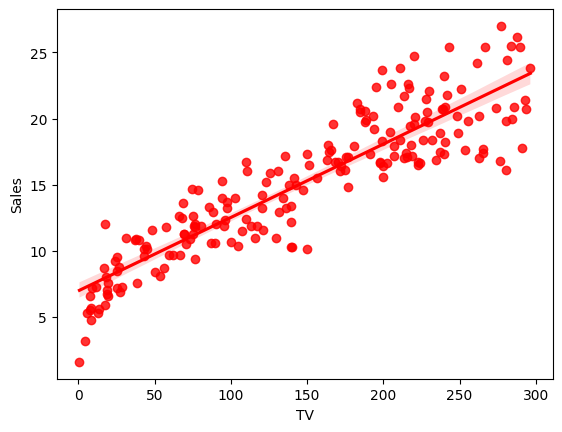

In [ ]:
# Ploting each independent variable with dependent variable
# TV Vs Sales
sns.regplot(x=df['TV'],y=y,color='red')  #regressionplot=regplot

<Axes: xlabel='Radio', ylabel='Sales'>

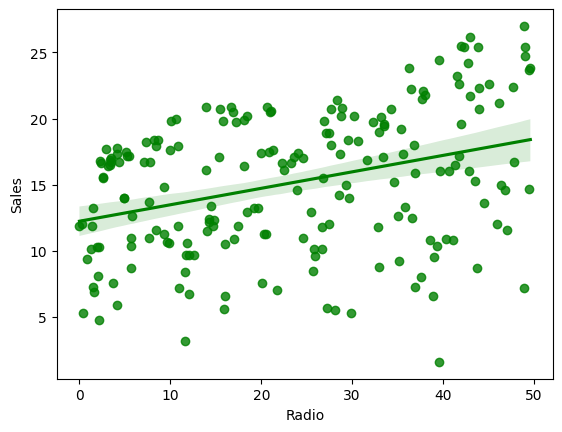

In [ ]:
#Radio Vs Sales
sns.regplot(x=df['Radio'],y=y,color='green')


<Axes: xlabel='Newspaper', ylabel='Sales'>

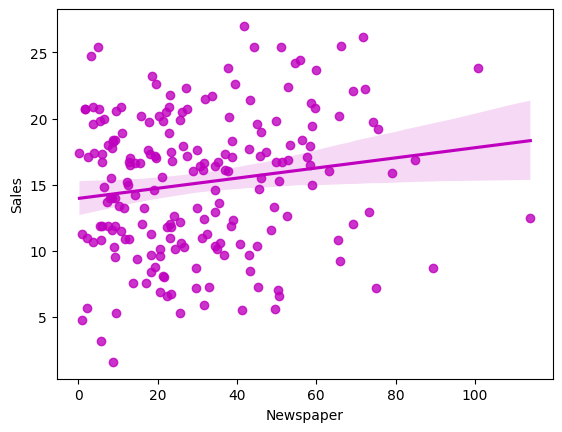

In [ ]:
sns.regplot(x=df['Newspaper'],y=y,color='m')

In [ ]:
# Training & Testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
# Model Creation => Multiple Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

NameError: ignored

In [ ]:
# Prediction
print(model.predict([[150.1,45.8,75.1]]))

[18.08706748]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Creating dataframe
values={'actual_value':y_test,'predicted_value':y_pred,'difference':y_test-y_pred}
df1=pd.DataFrame(values)
df1

In [ ]:
# Slope
print("Slope is")
list(zip(x,model.coef_))

Slope is


[('TV', 0.05358869132706914),
 ('Radio', 0.10270676778771287),
 ('Newspaper', 0.007931667677316324)]

In [ ]:
# Constant
print("constant is",model.intercept_)

constant is 4.743766701589685


In [ ]:
# Performance Evaluation
# a] MAE
from sklearn.metrics import mean_absolute_error
print("MAE Is ",mean_absolute_error(y_test,y_pred))

MAE Is  1.1594875061090582


In [ ]:
# b] MAPE
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE Is ",mean_absolute_percentage_error(y_test,y_pred))

MAPE Is  0.10536440823029307


In [ ]:
# c] MSE
from sklearn.metrics import mean_squared_error
print("MSE Is ",mean_squared_error(y_test,y_pred))

MSE Is  2.541624036229147


In [ ]:
# d] RMSE
data=mean_squared_error(y_test,y_pred)
print(np.sqrt(data))

1.5942471691143587


In [ ]:
# e] R2_score
from sklearn.metrics import r2_score
print("r2 score Is ",r2_score(y_test,y_pred))

r2 score Is  0.9091484341849799
